
# Problem Set 1 


**Name : `Sarthak Chakraborty`** 

**Roll-No : `16CS30044`** 

**Dept : `Computer Science and Engineering`** 

**Mail-ID : `sarthak.chakraborty@gmail.com`** 

## Preamble

To run and solve this assignment, one must have a working IPython Notebook installation. The easiest way to set it up for both Windows and Linux is to install [Anaconda](https://www.continuum.io/downloads). Then save this file to your computer, run Anaconda and choose this file in Anaconda's file explorer. Use `Python 3` version. Below statements assume that you have already followed these instructions. If you are new to Python or its scientific library, Numpy, there are some nice tutorials [here](https://www.learnpython.org/) and [here](http://www.scipy-lectures.org/).

To run code in a cell or to render [Markdown](https://en.wikipedia.org/wiki/Markdown)+[LaTeX](https://en.wikipedia.org/wiki/LaTeX) press `Ctr+Enter` or `[>|]`(like "play") button above. To edit any code or text cell [double]click on its content. To change cell type, choose "Markdown" or "Code" in the drop-down menu above.

We highly encourage students to put down their derivations into corresponding cells below. However, if one does not know LaTeX (and would find it too hard to learn it by looking at examples listed below between \$..\$), he or she might pass it in pen-and-paper format, however grading of these submissions might be delayed.

Put your solution into boxes marked with **`[double click here to add a solution]`** and press Ctr+Enter to render text. [Double]click on a cell to edit or to see its source code. You can add cells via **`+`** sign at the top left corner.

Submission instructions: please upload your completed solution file to [CSE Moodle](https://10.5.18.110/moodle/enrol/index.php?id=308) by the due date (see Schedule). If you have pen-and-paper answers, please hand them in in class on the same day. **`[ NOTE: You might need to bypass proxy for 10.5.18.110 in order to access the moodle.]`**


`Vector` stands for `column vector` below. Show all steps when proving statements.

### Problem 1: Closed-Form Maximum Likelihood

Assume that we are given $n$ iid samples $(x_1, ..., x_n)$ from each $P(x \ | \ \theta)$ below. Compute the maximum likelihood estimates (MLEs) for the parameter $\theta$ of given distributions. 

**Q1.1**: $P(x \ | \ \theta) = \theta e^{-\theta x}$ for $x \geq 0$

**Q1.2**: $P(x \ | \ \theta) = \frac{1}{\theta}$ for $ 0 \leq x \leq \theta$

**`A1.1`**  The likelihood for the given distribution can be written as,


$\begin{align}
\mathcal L(\theta) &= \prod_{i=1}^n \theta e^{-\theta x_i}\\
                    &= \theta^n e^{-\theta \sum_{i=1}^n x_i}
\end{align}$

$\therefore \log \mathcal L(\theta) = n \log \theta - \theta \sum_{i=1}^n x_i$ 

Differentiating wrt $\theta$, and equating to 0 we get,

$\begin{align}
    \frac{n}{\hat\theta} - \sum_{i=1}^n x_i &= 0\\
   \implies \hat\theta &= \frac{n}{\sum_{i=1}^n x_i} .... (Ans)
\end{align}$ 



**`A1.2`** The likelihood for the given distribution can be written as,


$\begin{align}
    \mathcal L(\theta) &= \prod_{i=1}^n \frac{1}{\theta}\\
                        &= \frac{1}{\theta^n}
 \end{align}$
             
$\therefore \mathcal L(\theta) = 
   \begin{cases}
       \frac{1}{\theta^n}, & 0 \leq x_i \leq \theta \forall i=1, \cdots ,n \\
       0, & \text{otherwise}
   \end{cases}$
   
However, $\frac{1}{\theta^n}$ is a decreasing function and $\theta$ must take a value such that $\theta \geq x_i \forall i=1, \cdots ,n$. So the smallest possible value of $\theta$ that will be maximize the likelihood function following the constraint $\theta \geq x_i \forall i=1, \cdots ,n = \max(x_1, x_2, \cdots, x_n)$. Any value greater than this will decrease the likelihood value.

Thus, MLE estimate of $\theta$ is $\hat\theta = \max(x_1, x_2, \cdots, x_n) ..... (Ans)$.

### Problem 2: Gradient for Maximum Likelihood Estimation

Sometimes, we can't find MLEs in closed-form, in this case, we can use an iterative scheme to solve resulting optimization problem $\theta_{MLE} = \arg\max P(x \ | \ \theta)$. First-order iterative schemes (e.g. Gradient Descent, Stochastic Gradient Descent, Nesterov Accelerated Gradient Descent) require gradient information at each visited point. Compute gradients for log-likelihood of the following model:

- we have $X \in \mathbf R^{n \times d}$ - constant data matrix, $\mathbf x_i$ - vector corresponding to a single data point $(\mathbf x_i \in \mathbf R^d)$
- $\theta$ is a $d$-dimensional (unknown) weight vector
- $\varepsilon \sim \text{Student}(v)$ is a $n$-dimensional (unknown) noise vector
- and we observe vector $\mathbf y = X\theta + \varepsilon$

Which means that
$$ P(y_i \ | \ \mathbf x_i, \theta, v) = \frac{1}{Z(v)} \Big(1 + \frac{(\theta^T \mathbf x_i - y_i)^2}{v}\Big)^{-\frac{v+1}{2}}$$

where $Z$ stands for a normalization constant that does not depend on $\theta$, and $v$ is a constant parameter.

Denote log-likelihood as $\mathcal L(\theta)$ and log-likelihood for a single sample $i$ as $\mathcal L_i(\theta) = \mathcal L(\theta \ | \ \mathbf x_i, y_i)$.

**Q2.1**: Find $\frac{\partial \mathcal L_i(\theta)}{\partial \theta}$.

**`A2.1`**  Log-likelihood for a single sample can be easily written from the given probability distribution as 

$\mathcal L_i(\theta) = -\log Z(\nu) -\frac{\nu +1}{2} \log(1 + \frac{(\theta^T \mathbf x_i - y_i)^2}{\nu})$

Differentiating with respect to $\theta$, we get,

$\begin{align}
\frac{\partial \mathcal L_i(\theta)}{\partial \theta} &= 0 - \frac{\nu +1}{2}.\frac{1}{1 + \frac{(\theta^T \mathbf x_i - y_i)^2}{\nu}}.\frac{2}{\nu} (\theta^T \mathbf x_i - y_i) . \mathbf x_i\\
&= -(\nu + 1) \frac{\nu}{\nu + (\theta^T \mathbf x_i - y_i)^2} . \frac{(\theta^T \mathbf x_i - y_i) . \mathbf x_i}{\nu}\\
&= -(\nu+1) \frac{(\theta^T \mathbf x_i - y_i) x_i}{\nu + (\theta^T \mathbf x_i - y_i)^2}
\end{align}$

**Q2.2**: Check the result obtained in the previous section by coding an SGD for $\mathcal L(\theta)$ and plotting how function value changes as a function of a number of passed gradient steps. Try multiple learning rates (1e-1, 1e-3, 1e-6), explain the result. Consider $Z(v)=1$ and $v=4$ for plotting.

We marked places where you are expected to add/change your own code with **`## -- ! code required`** comment.

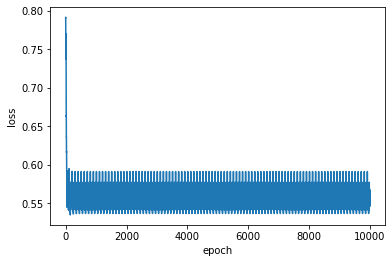

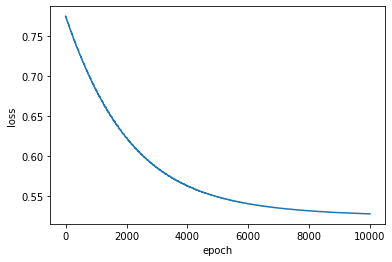

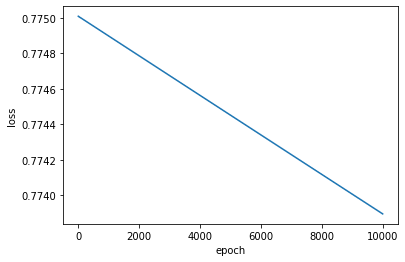

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def generate_data(n=100, d=10, v=4):
    X = np.random.rand(n, d)*2-1
    theta = np.random.rand(d, 1)
    noise = np.random.standard_t(4, n).reshape((-1, 1))
    return X, X @ theta + noise

def loss(X, y, theta, v=4):
    loss = 0
    for i in range(X.shape[0]):
        err = X[i].dot(theta) - y[i]
        mantissa = 1 + err**2 / v
        negative_log_likelihood = ((v+1)/2) * np.log(mantissa)
        loss += negative_log_likelihood
    return loss/X.shape[0]


def loss_grad_i(X, y, theta, i, v=4):
    err = X[i].dot(theta) - y[i]
    grad = -(v+1) * err / (v + err**2)
    likelihood_grad = X[i] * grad
    return likelihood_grad

def sgd_plot(theta_init, X, y, n_steps=100):
    for learning_rate in [1e-1, 1e-3, 1e-6]:
        theta = theta_init.copy().reshape(-1)
        losses = []
        for step_n in range(n_steps):
            loss_i = 0
            for i in range(X.shape[0]):
                theta = theta + learning_rate * loss_grad_i(X, y, theta, i)
                loss_i = loss(X, y, theta)
                losses.append(loss_i)
        plt.plot(losses)
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.show()
    
def main(n=100, d=10, v=4):
    X, y = generate_data(n, d, v)
    theta_init = np.random.rand(d, 1)
    sgd_plot(theta_init, X, y)
    
main()

In all of the above plots, we see that loss decreases wrt epoch. However, the rate of decrease is different in the three cases. For the first plot, since the learning rate is high(0.1), loss decreases quickly and then oscillates. The reason for oscillations in the first plot might be the high value of learning rate which is preventing the algorithm to reach the minima. However, for the other two plots, learning rate is lesser than the first one(1e-3 and 1e-6), and hence loss decreases gradually with a lower rate.

Thus we conclude that the appropriate learning rate for the above problem is 1e-3.

### Problem 3: Logistic Regression

Assume that we observe data generated via the following model:

- $X \in \mathbf R^{n \times d}$ - constant data matrix
- $\theta_j \sim \mathcal N(0, \sigma_\theta)$; $\theta$ is $d$-dimensional random vector (`This is a prior information that` $\theta$ `follows normal distribution`)
- $\varepsilon_i \sim \text{Logistic}(0, \sigma_\epsilon)$; $\varepsilon$ is $n$-dimensional random noise vector distributed according to [Logistic](https://en.wikipedia.org/wiki/Logistic_distribution) distribution
- and we observe $\mathbf y = \mathbf 1[X \theta + \varepsilon \geq 0]$ - boolean random vector

or, in other words: there exists some data $X$, we sample weights vector $\theta$ of the corresponding shape from multivariate normal distribution, multiply features from $X$ by weights from $\theta$, add random logistically distributed noise to resulting numbers, and observe whether resulting (noisy) random variable exceeds zero. So we are given the data matrix X and y, we want to estimate the weight vector $\theta$ as accurately as possible. 

**`Show that given model definition above, the following holds:`**

**Q3.1**: $ P(y_i = 1 \ | \ \theta, \mathbf x_i) = \text{logistic}\Big(\frac{\theta^T \mathbf x_i}{\sigma_\epsilon}\Big)$

 where $ \text{logistic}(x) := \frac{1}{1+\exp(-x)}$ is a standard [logistic function](https://en.wikipedia.org/wiki/Logistic_function#Mathematical_properties), $\mathbf x_i$ denotes $i$-th data sample vector, $\mathbf 1[\dots]$ denotes indicator function. Do not get confused between standard [logistic function](https://en.wikipedia.org/wiki/Logistic_function#Mathematical_properties) and [Logistic](https://en.wikipedia.org/wiki/Logistic_distribution) distribution.
 
 **Hints:** 
 
 - for a random variable $\zeta \sim P$ what is $P(\zeta \leq a)$ ? (answer: $F_{\zeta}(a)$ - value of cumulative density function for the distribution of $\zeta$)

**`A3.1`** We know that the CDF of $ \frac{e^{-x}}{(1 + e^{-x})^2} $(logistic distribution) is $\frac{1}{1 + e^{-x}}$(logistic function), that is, $\int_{-\infty}^x \frac{e^{-x}}{(1 + e^{-x})^2}dx = \frac{1}{1 + e^{-x}} $ . We will use this fact in the proof below.

Thus, $ P(y_i = 1 \ | \ \theta, \mathbf x_i)  =  P(\theta^T \mathbf x_i + \varepsilon_i \geq 0)$

Since $\varepsilon_i \sim \text{Logistic}(0, \sigma_\epsilon)$, implies $\theta^T \mathbf x_i + \varepsilon_i \sim \text{Logistic}(\theta^T \mathbf x_i, \sigma_\epsilon) = \frac{e^{-\frac{x - \theta^T \mathbf x_i}{\sigma_\epsilon}}}{\sigma_\epsilon (1 + e^{-\frac{x - \theta^T \mathbf x_i}{\sigma_\epsilon}})^2}$

From this, we can easily find out $ P(\theta^T \mathbf x_i + \varepsilon_i \geq 0) = \int_0^\infty \text{Logistic}(\theta^T \mathbf x_i, \sigma_\epsilon) dx$

Taking $z = 1 + e^{-\frac{x - \theta^T \mathbf x_i}{\sigma_\epsilon}} $, we have $ \int_{f(\theta, \epsilon)}^1 \frac{dz}{z^2} $, where $ f(\theta, \epsilon) = 1 + e^\frac{\theta^T \mathbf x_i}{\sigma_\epsilon} $

On solving the integral, we get the desired result, that is, $ \frac{1}{1 + e^{-\frac{\theta^T \mathbf x_i}{\sigma_\epsilon}}} = \text{logistic}\Big(\frac{\theta^T \mathbf x_i}{\sigma_\epsilon}\Big) $. Hence proved. $...(Ans)$

Let us consider $\sigma_{\epsilon} = 1$ everywhere further.

**Q3.2**: $ P(y_i \ | \ \theta, \mathbf x_i) = (\text{logistic}(\theta^T \mathbf x_i))^{y_i} (1-\text{logistic}(\theta^T \mathbf x_i))^{(1-y_i)}$

**`A3.2`**
Considering $\sigma_{\epsilon} = 1$, we have $ P(y_i=1 \ | \ \theta, \mathbf x_i) = \text{logistic}(\theta^T \mathbf x_i))$ and $ P(y_i=0 \ | \ \theta, \mathbf x_i) = 1 - \text{logistic}(\theta^T \mathbf x_i))$.


 Thus, on combining the two equations, we get the result:
 
 
 $\therefore P(y_i \ | \ \theta, \mathbf x_i) = (\text{logistic}(\theta^T \mathbf x_i))^{y_i} (1-\text{logistic}(\theta^T \mathbf x_i))^{(1-y_i)} ...(Ans)$ 

**Q3.3**: $ \log P(y_i \ | \ \theta, \mathbf x_i) = y_i \theta^T \mathbf x_i - \log(1 + \exp(\theta^T \mathbf x_i))$

**`A3.3`**

$\begin{align}
 \log P(y_i \ | \ \theta, \mathbf x_i) &= y_i \log \text{logistic}(\theta^T \mathbf x_i) + (1-y_i) \log (1-\text{logistic}(\theta^T \mathbf x_i)) \\
& = - y_i \log (1 + \exp(-\theta^T \mathbf x_i)) + (1-y_i)[\log \exp(-\theta^T \mathbf x_i) - \log (1 + \exp(-\theta^T \mathbf x_i))] \\
& = y_i \log (1 + \exp(-\theta^T \mathbf x_i)) - (1-y_i)\theta^T \mathbf x_i -\log (1 + \exp(-\theta^T \mathbf x_i))  + y_i \log (1 + \exp(-\theta^T \mathbf x_i))\\
& = y_i\theta^T \mathbf x_i -\log (1 + \exp(-\theta^T \mathbf x_i)) - \theta^T \mathbf x_i \\
& = y_i\theta^T \mathbf x_i -\log (1 + \exp(-\theta^T \mathbf x_i)) - \log \exp(\theta^T \mathbf x_i) \\
& = y_i\theta^T \mathbf x_i -[\log (1 + \exp(-\theta^T \mathbf x_i)) + \log \exp(\theta^T \mathbf x_i)] \\
& = y_i\theta^T \mathbf x_i - \log[ (1 + \exp(-\theta^T \mathbf x_i)). \exp(\theta^T \mathbf x_i)] \\
& = y_i\theta^T \mathbf x_i - \log (1 + \exp(\theta^T \mathbf x_i)) ... (Ans)
\end{align}$

The vector $\mathbf 1_{n \times 1}$ denotes column of ones.

**Q3.4**: $ \mathcal L_{MLE}(\theta) = \log P(\mathbf y \ | \ X, \theta) = y^T X \theta - \mathbf 1_{n \times 1}^T \cdot \log(\mathbf 1_{n \times 1} + \exp(X \theta)) $

**`A3.4`** The expression above is a trivial extension of `A3.3` in multidimensional domain. Here $ \mathcal L_{MLE}(\theta) $ implies the log-likelihood for the complete $n$ data samples.

$ \mathcal L_{MLE}(\theta) = \sum_{i=1}^n [y_i\theta^T \mathbf x_i - \log (1 + \exp(\theta^T \mathbf x_i))] $

$ \theta^T \mathbf x_i $ multiplies each component of $ \mathbf x_i $ to each component of $\theta$ to yield a number corresponding to that data point $\mathbf x_i $. Hence, for $n$ data samples, each sample must be weighted by $\theta$, which is the operation defined by $X \theta$, where $ X $ is $(n \times d)$ and $\theta$ is $(d \times 1) $. Doing a dot product with $y$, that is, $y^T X \theta$ yields the desired summation $\sum_{i=1}^n y_i\theta^T \mathbf x_i$.

$ \sum_{i=1}^n \log (1 + \exp(\theta^T \mathbf x_i)) $ can be written as $ \mathbf 1_{n \times 1}^T \cdot \log(\mathbf 1_{n \times 1} + \exp(X \theta)) $. Here, $ \log(\mathbf 1_{n \times 1} + \exp(X \theta)) $ term produces an $(n \times 1)$ vector where each row $i$ corresponds to $\log (1 + \exp(\theta^T \mathbf x_i))$. A dot product with $ \mathbf 1_{n \times 1}$ yields the desired summation.

Hence, clubbing the two summation will result in the log-likelihood $(\mathcal L_{MLE}(\theta))$ of the entire data.$....(Ans)$


One way of estimating true weight vector $\theta$ is by finding an MLE estimate. To make use of prior information,  one might want to find [maximum a posteriori estimation](https://en.wikipedia.org/wiki/Maximum_a_posteriori_estimation) (MAP) that can be derived from likelihood $P(X|\theta)$ and prior $P(\theta)$ over weights as following (Bayes rule):

$$
\begin{align}
\theta_{MAP} &= \arg\max_\theta P(\theta | X) = \arg\max_\theta \frac{P(X|\theta)P(\theta)}{\int_{\Theta} P(X|\theta)P(\theta) d \theta} = \arg\max_\theta \big[ \log P(X|\theta) + \log P(\theta) - \log \int_{\Theta} P(X|\theta)P(\theta) d \theta \big] \\ &= \arg\max_\theta \big[ \log P(X|\theta) + \log P(\theta) \big] = \arg\max_\theta \mathcal L_{MAP}(\theta)
\end{align}
$$

In the model definition above, normal prior over weights is specified by line $\theta_j \sim \mathcal N(0, \sigma_\theta)$, which essentially means that "weight vector components should not be too far from zero".

**Q3.5**: $\mathcal L_{MAP}(\theta) = \log P(\theta \ | \ X, \mathbf y) = y^T X \theta - \mathbf 1_{n \times 1}^T \cdot \log(\mathbf 1_{n \times 1} + \exp(X \theta)) - \lambda \ ||\theta||^2_2 + C$

$\lambda = \frac{1}{2\sigma_\theta}$, $C$ - term that does not include $\theta$

**`A3.5`** We know that  $\mathcal L_{MAP}(\theta) = \log P(\mathbf y|X, \theta) + \log P(\theta) -\log \int_{\Theta} P(X, \mathbf y|\theta)P(\theta) d \theta$. Thus, for n samples of d-dimensional data, we need to calculate $\mathcal L_{MAP}(\theta)$.

However, from `A3.4`, we have $\log P(\mathbf y|X, \theta) = \log P(\mathbf y \ | \ X, \theta) = y^T X \theta - \mathbf 1_{n \times 1}^T \cdot \log(\mathbf 1_{n \times 1} + \exp(X \theta)) $. Thus we only need to show that $\log P(\theta) = - \lambda \ ||\theta||^2_2 + C $.

It has already been mentioned in the question that $\theta_j \sim \mathcal N(0, \sigma_\theta)$. Therefore, $P(\theta_j) = \frac{1}{\sqrt{2 \pi \sigma_\theta}} e^{-\frac{\theta_j^2}{2 \sigma_\theta}}  \implies  \log P(\theta_j) = C_1 - \frac{1}{2 \sigma_\theta} \theta_j^2 $.

$\therefore \log P(\theta) = C_1 - \frac{1}{2 \sigma_\theta} \theta^T \theta = C_1 - \frac{1}{2 \sigma_\theta} ||\theta||_2^2 $. Replacing $\lambda = \frac{1}{2 \sigma_\theta} $, we obtain the equation $\log P(\theta) = - \lambda ||\theta||_2^2 +C_1 $. On adding the two log-likelihood, we obtain

$\mathcal L_{MAP}(\theta) = \log P(\theta \ | \ X, \mathbf y) = y^T X \theta - \mathbf 1_{n \times 1}^T \cdot \log(\mathbf 1_{n \times 1} + \exp(X \theta)) - \lambda \ ||\theta||^2_2 + C_1 + C_2$. Here $C_2$ refers to the term $-\log \int_{\Theta} P(X, \mathbf y|\theta)P(\theta) d \theta$ which is independent of $\theta$. Now, We can write $C_1+C_2=C$ which completes the proof. $... (Ans)$

**Q3.6**: $\frac{\partial \mathcal L_{MAP}(\theta)}{\partial \theta} = X^T(y - \text{logistic}(X\theta))) - 2 \lambda \theta $

**`A3.6`**  From the previous question, we have $\mathcal L_{MAP}(\theta) = \log P(\theta \ | \ X, \mathbf y) = y^T X \theta - \mathbf 1_{n \times 1}^T \cdot \log(\mathbf 1_{n \times 1} + \exp(X \theta)) - \lambda \ ||\theta||^2_2 + C$.

Finding the derivative of $\mathcal L_{MAP}(\theta)$ is trivial given the equation.

$\therefore
\begin{align}
\frac{\partial \mathcal L_{MAP}(\theta)}{\partial \theta} &= (y^T X)^T - (\big(\frac{\exp(X \theta)}{\mathbf 1_{n \times 1} + \exp(X \theta)}\big)^T X)^T - 2 \lambda \theta \\
&= X^T y - X^T\big(\frac{\mathbf 1_{n \times 1}}{\mathbf 1_{n \times 1} + \exp(-X \theta)}\big) - 2 \lambda \theta \\
& = X^T y - X^T \text{logistic}(X \theta) - 2 \lambda \theta \\
&= X^T(y - \text{logistic}(X\theta))) - 2 \lambda \theta ... (Ans)
\end{align}$

### Problem 4: Coding Logistic Regression

**Don't be scared by the size of the coding part!** If you find my code below horribly disgusting or amazingly incomprehensible (underscore one) and don't want to read it, you can skip most parts that do not have **`## ! -- code required`** comment in them and just execute the rest without reading. However, I highly encourage you not to do so, to fully dive into the Zen of Python Plotting (a very useful skill!). Some bonuses and my personal respect will be granted to those who will tweak the plotting code in the coolest way or show interesting extra results.

Here's the code that generates data according to model specification (**Problem 3**) and plots for `k_features=2`.

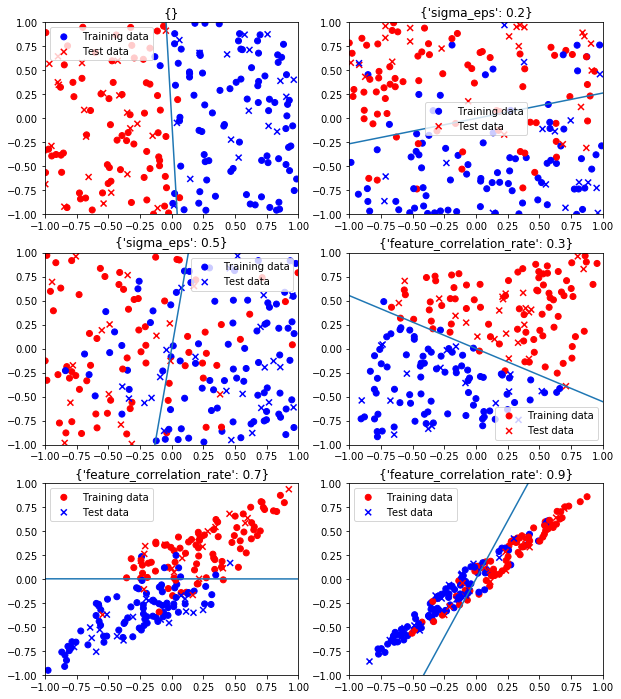

In [5]:
import numpy as np

def generate_logistic_regression_data(n_samples=200, k_featues=2, sigma_eps=0.1, 
                                      sigma_theta=1, feature_correlation_rate=0, train_test_ratio=4):
    assert 0 <= feature_correlation_rate <= 1
    X_noncorr = np.random.rand(n_samples, k_featues)*2-1 # [0, 1] -> [-1, 1] center around zero
    mixture_matrix = np.eye(k_featues)*(1-feature_correlation_rate) + feature_correlation_rate/k_featues
    X = X_noncorr @ mixture_matrix
    theta_real = np.random.normal(scale=sigma_theta, size=k_featues)[:, np.newaxis] # column
    noise = np.random.logistic(scale=sigma_eps, size=n_samples)[:, np.newaxis]
    y = ((X @ theta_real + noise) > 0).astype(np.int16)
    split_idx = int(n_samples * train_test_ratio / (train_test_ratio + 1))
    return X[:split_idx, :], y[:split_idx], X[split_idx:, :], y[split_idx:], theta_real

def plot_2d_data(subfig, X, y, X_test, y_test, theta):
    assert len(X.shape) == 2
    subfig.scatter(X[:, 0], X[:, 1], color = [['r', 'b'][c] for c in np.ravel(y)], label="Training data")
    point_color_arr = [['r', 'b'][c] for c in np.ravel(y_test)]
    subfig.scatter(X_test[:, 0], X_test[:, 1], marker='x', color = point_color_arr, label="Test data")
    subfig.plot((1, -1), (-theta[0]/theta[1], theta[0]/theta[1]))
    subfig.set_xlim(-1, 1)
    subfig.set_ylim(-1, 1)
    
def subfig_iter(it, val_name=None, n_col=2, base_size=(10,2), title=None, fmt='%s'):
    n_rows = int(len(it)/n_col) + len(it) % n_col
    size = (base_size[0], base_size[1]*len(it))
    fig, _axes = plt.subplots(n_rows, n_col, figsize=size)
    for subfig, val in zip(np.ravel(_axes).tolist(), it): 
        yield (val, subfig)
        if val_name is not None:
            if val_name == '':
                subtitle = fmt % (val)
            else:
                subtitle = ('%s = '+fmt) % (val_name, val)
            subfig.set_title(subtitle)
            subfig.legend(loc='best')
    if title is not None:
        fig.suptitle(title, verticalalignment='top') 

def test_draw():
    data_args_dicts = [
        dict(), {'sigma_eps': 0.2}, {'sigma_eps': 0.5}, {'feature_correlation_rate': 0.3}, 
        {'feature_correlation_rate': 0.7}, {'feature_correlation_rate': 0.9},
    ]
    for arg_dict, subfig in subfig_iter(data_args_dicts, val_name=''):
        data = generate_logistic_regression_data(**arg_dict)
        X_train, y_train, X_test, y_test, theta_real = data
        plt.title(str(arg_dict))
        plot_2d_data(subfig, X_train, y_train, X_test, y_test, theta_real)
        
    plt.show()

test_draw()

**Q4.1.1**: When we use `feature_correlation_rate` ($\alpha$) the following happens: we construct a matrix $M$ that has values $1 - \frac{n-1}{n}\alpha$ on the diagonal and values $\frac{\alpha}{n}$ everywhere else. What happens to resulting matrix $XM$ if $\alpha$ is either 0 or 1? (If you do not know what feature correlation is here is a link that can help. [Feature Correlation](https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf))

**`A4.1.1`** 

`A)` If $\alpha=0$, then the diagonal entries of matrix $M$ will be 1 while the off-diagonal entries will be 0. Thus, $M$ will effectively be an identity matrix. When we will apply the operation $XM$ on $X$, we will get back the same original matrix $X$. This makes sense, since $\alpha=0$ which implies that feature correlation is 0. Hence all the features are linearly independent.

`B)` If $\alpha=1$, then all the entries in the matrix $M$ will be $\frac{1}{n}$. Thus, when we will apply the operation $XM$ on $X$, each row of the resulting matrix will be a linear combination of all the rows. For example, if $X$ had n rows, that is, n data samples(each sample may be multidimensional), then any sample $i$ of $XM$ will be $\frac{x^{(i)}_1 + x^{(i)}_2 + \ldots + x^{(i)}_d}{n} $. This is compliant with the feature correlation rate because $\alpha=1$ implies that the data is fully correlated. Hence, all the features are dependent and so all the $d$ columns of the each sample will have the same value. 

**Q4.2**: Why did we implement $\text{softplus}(x) = \log(1+\exp(x))$ as shown below? What is numerical under- and overflow and how people deal with it?

**`A4.2`**  When the value of $x$ is high, $\text{softplus}(x)$ tends to overshoot due to the presence of exponential term in it. Hence to prevent this overflow in the value, $\text{softplus}(x)$ is implemented in a different way.
Here, if the value of $|x|$ < 5, we use the usual softplus expression to find its value. Else, we exploit the property that for high values of $x$ (here $x > 5$),  $e^x >> 1 \implies (1 + e^x) \sim e^x \implies \log(1+e^x) \sim x$. And for low values of $x$ (here $x < -5$), $e^x \sim 0 \implies \log(1+e^x) \sim 0$. This has been done in the code below.

Numerical underflow refers to the condition when the value of some variable becomes so low that it is reported as 0. Similarly, overflow refers to the condition when the value of some variable becomes so high that is reported as $\infty$.

Overflow and underflow mostly occurs in the case when multiple numbers are multiplied together, that is, for cases like $x_1 . x_2 . \ldots . x_n$. If each $x_i$ are small, it can result in underflow, or if their values are high, it can result in overflow. To prevent this, we use turn the product into sum by using $\log(.)$ expression. Cases when there is a sum of products, we use $\exp \log$ to prevent under and overflow.

In [6]:
import numpy as np

def softplus(x_, limit=5):
    x = np.array(x_)
    compute_real_mask = np.logical_and(-limit < x, x < limit)
    return_same_mask = x >= limit
    computed_real_part = np.log(1 + np.exp(x*compute_real_mask)*compute_real_mask)
    returned_same_part = x*return_same_mask
    return computed_real_part + returned_same_part

def test_softplus():
    x_arr = np.linspace(-200, 200)
    softplus_true = np.log(1 + np.exp(x_arr))
    softplus_stable = softplus(x_arr)
    assert np.max(abs(softplus_true-softplus_stable)) < 1e-3
    
test_softplus()

def logistic(x):
    return 1/(1+np.exp(-x))

**Q4.3**: Write (by filling in the missing code below) Gradient Descent and Stochastic Gradient Descent algorithm for the MAP loss and plot 

- MAP loss
- L2 distance between current theta and true one
- cosine distance between current theta and true one

use results from **Q3.6**. Note that our loss is $loss(\theta) = -\mathcal L(\theta)$ and it is usually referred as "the negative log-likelihood".

In [7]:
from numpy.linalg import norm
from scipy.spatial.distance import cosine
import matplotlib.cm as cm

def logistic_MAP_loss(X, y, theta_current, lambd):
    loss = 0
    for i in range(X.shape[0]):
        part1 = y[i] * X[i].dot(theta_current)
        part2 = np.log(1 + np.exp(X[i].dot(theta_current)))
        part3 = lambd * (theta_current.T).dot(theta_current)
        loss += part1 - part2 - part3
    return -loss/X.shape[0]

def logistic_MAP_loss_gradient(X, y, theta_current, lambd):
    sof = X.dot(theta_current)
    logistic = 1.0 / (1 + np.exp(-sof))
    grad = X.T * (y - logistic) - 2*lambd*theta_current
    return grad

def logistic_MAP_loss_single_gradient(X, y, smaple_id, theta_current, lambd):
    x_i = X[smaple_id].reshape((1, -1))
    y_i = y[smaple_id].reshape((1, 1))
    return logistic_MAP_loss_gradient(x_i, y_i, theta_current, lambd)

def logistic_classification_accuracy(X, y, theta_current):
    n_correct = 0
    for i in range(X.shape[0]):
        sof = X[i].dot(theta_current)
        logistic = 1.0 / (1 + np.exp(-sof))
        y_pred = (logistic > 0.5).astype(np.int16)
        if(y[i] == y_pred):
            n_correct += 1        
    return n_correct/X.shape[0]


def run_MAP_gd(X, y, lambd, learning_rate = 0.01, max_epoch_n=200, init_theta=None):
    theta = init_theta if init_theta is not None else np.ones((X.shape[1], 1))*5
    steps = []
    for epoch_n in range(max_epoch_n):
        loss_grad = 0
        for sample_id in range(X.shape[0]):
            loss_grad += logistic_MAP_loss_single_gradient(X, y, sample_id, theta, lambd)
        loss_grad /= X.shape[0]
        theta = theta + learning_rate * loss_grad
        steps.append(theta)
    return steps

def run_MAP_sgd(X, y, lambd, learning_rate = 0.01, max_epoch_n=200, init_theta=None):
    theta = init_theta if init_theta is not None else np.ones((X.shape[1], 1))*5
    steps = []
    for epoch_n in range(max_epoch_n):
        for smaple_id in range(X.shape[0]):
            theta = theta + learning_rate * logistic_MAP_loss_single_gradient(X, y, smaple_id, theta, lambd)
        steps.append(theta)
    return steps

/home/sarthak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/home/sarthak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/home/sarthak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


gd runtime: 7.7294100000000014
gd train accuracy: 0.73125
gd test accuracy: 0.75


/home/sarthak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


sgd runtime: 7.868071999999984
sgd train accuracy: 0.95
sgd test accuracy: 0.95


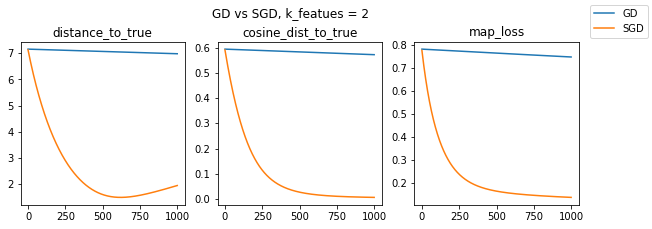

gd runtime: 8.166114000000022
gd train accuracy: 0.5375
gd test accuracy: 0.45
sgd runtime: 9.892063000000007
sgd train accuracy: 0.95
sgd test accuracy: 0.675


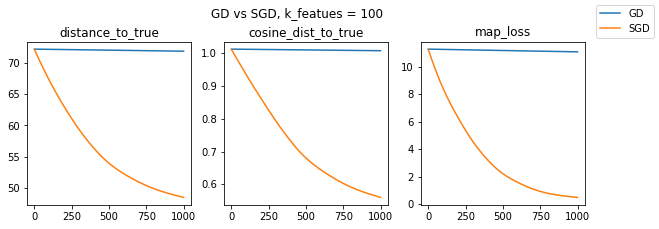

In [8]:
import time

def draw_gd_plots(axes, theta_steps, X, y, lambd, theta_real):
    collected_val_dicts = []
    for theta in theta_steps:
        collected_val_dicts.append({
                'distance_to_true': np.linalg.norm(theta-theta_real),
                'cosine_dist_to_true': cosine(theta, theta_real),
                'map_loss': float(logistic_MAP_loss(X, y, theta, lambd)),
            })
        
    
    for plot_id, key in enumerate(collected_val_dicts[0].keys()):
        subfig = axes[plot_id]
        subfig.set_title(key)
        subfig.plot(list(d[key] for d in collected_val_dicts))

def main():
    for k_featues in [2, 100]:
        data_args = {'n_samples': 200, 'k_featues': k_featues, 'sigma_eps': 0.3, 
                     'sigma_theta': 5, 'feature_correlation_rate': 0}
        data = generate_logistic_regression_data(**data_args)
        X_train, y_train, X_test, y_test, theta_real = data
        fig, axes = plt.subplots(1, 3, figsize=(10,3))
        lamdb = 0
        
        now = time.clock()
        steps = run_MAP_gd(X_train, y_train, lamdb, learning_rate=1e-3, max_epoch_n=1000)
        draw_gd_plots(axes, steps, X_train, y_train, lamdb, theta_real)
        print('gd runtime:', time.clock() - now)
        print('gd train accuracy:', logistic_classification_accuracy(X_train, y_train, steps[-1]))
        print('gd test accuracy:', logistic_classification_accuracy(X_test, y_test, steps[-1]))
        
        now = time.clock()
        steps = run_MAP_sgd(X_train, y_train, lamdb, learning_rate=1e-3, max_epoch_n=1000)
        draw_gd_plots(axes, steps, X_train, y_train, lamdb, theta_real)
        fig.suptitle('GD vs SGD, k_featues = %d' % k_featues, verticalalignment='bottom')
        print('sgd runtime:', time.clock() - now)
        print('sgd train accuracy:', logistic_classification_accuracy(X_train, y_train, steps[-1]))
        print('sgd test accuracy:', logistic_classification_accuracy(X_test, y_test, steps[-1]))
        
        fig.legend(['GD', 'SGD'])
        
        plt.show()
    
main()

**Q4.3.1**: We expect loss to gradually decrease. Re-run code above several times (sgd might work differently). Explain plots above.

**`A4.3.1`**  As we expect, the loss gradually decreases. However, for sgd it might show a slight increase at times because of its stochastic nature. As the epochs proceed, we see that l2 norm and cosine distance between the true theta and estimated theta also decreases. For sgd, the l2 norm might increase in the later epochs due to the stochastic nature of the algorithm, and hence the theta might move away from the optimum.

When number of features increases, sgd shows a relatively slower rate of change of loss, since it has to decrease the loss from all directions. Hence it requires more epochs to investigate all the features. When k_features=2, sgd can quickly investigate them and hence shows a sharper fall.

Accuracy of the two algorithms have also been printed to show a comparison. Since learning rate is small, gd shows very small change in the value of loss, and hence the accuracies are not high. However, for sgd, the accuracy is high.

.

.

.

Wow, you made it this far, that is impressive. Congratulations!